# Box Plot

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
#import statsmodels.api as sm
import seaborn as sns
import matplotlib

matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [2]:
pd.set_option('display.max_columns',500) 
#출력시 생략 X

In [3]:
df1_val = pd.read_excel("BG_Univariate.xlsx",sheet_name="Validation")
df1_val=df1_val.set_index('VAL')
df1_train = pd.read_excel("BG_Univariate.xlsx",sheet_name="Train")
df1_train=df1_train.set_index('TRAIN')
df2_val = pd.read_excel("BG_Multivariate_Value.xlsx",sheet_name="Validation")
df2_val=df2_val.set_index('VAL')
df2_train = pd.read_excel("BG_Multivariate_Value.xlsx",sheet_name="Train")
df2_train=df2_train.set_index('TRAIN')
df3_val = pd.read_excel("BG_Multivariate_0_1.xlsx",sheet_name="Validation")
df3_val=df3_val.set_index('VAL')
df3_train = pd.read_excel("BG_Multivariate_0_1.xlsx",sheet_name="Train")
df3_train=df3_train.set_index('TRAIN')

In [4]:
cols=['Comment']
df2_val.drop(cols, axis=1, inplace=True)
df2_train.drop(cols, axis=1, inplace=True)
df3_val.drop(cols, axis=1, inplace=True)
df3_train.drop(cols, axis=1, inplace=True)

In [5]:
df2_val

,RNN_15,RNN_30,RNN_60,LSTM_15,LSTM_30,LSTM_60,SLSTM_15,SLSTM_30,SLSTM_60,BLSTM_15,BLSTM_30,BLSTM_60,GRU_15,GRU_30,GRU_60
VAL,,,,,,,,,,,,,,,
Sam_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam_4,12.348254,20.032011,35.058868,12.714410,20.201773,35.618450,11.113446,18.124851,31.904629,11.407502,19.842045,35.741947,12.232445,19.157049,34.418507
Sam_5,11.030983,20.169693,33.031170,11.138407,19.638182,34.081615,10.909716,20.304680,34.685020,11.274434,20.125393,35.691242,10.601842,19.622520,34.607445
Sam_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam_10,10.255667,15.723925,29.093735,8.830861,16.365564,28.707188,9.476698,15.699814,27.220388,8.993172,15.732971,31.237423,9.695850,17.592098,29.185032


In [6]:
df1_val=df1_val.dropna()
df1_train=df1_train.dropna()
df2_val=df2_val.dropna()
df2_train=df2_train.dropna()
df3_val=df3_val.dropna()
df3_train=df3_train.dropna()

In [7]:
df1_val

,RNN_15,RNN_30,RNN_60,LSTM_15,LSTM_30,LSTM_60,SLSTM_15,SLSTM_30,SLSTM_60,BLSTM_15,BLSTM_30,BLSTM_60,GRU_15,GRU_30,GRU_60
VAL,,,,,,,,,,,,,,,
Sam_1,26.854633,40.024243,54.880226,26.402745,42.489192,53.649741,28.218610,42.877581,54.741967,27.301202,44.956751,53.442187,25.451551,39.291000,54.916565
Sam_3,8.176680,14.188218,30.674542,10.222731,15.608697,30.100113,8.942386,17.099501,39.160685,11.459472,12.869140,28.004707,6.889841,15.404279,26.442139
Sam_4,12.340954,20.623681,35.305947,12.293086,19.965777,35.661033,11.312514,19.155846,35.366440,14.418453,20.634770,35.805218,12.663463,20.990197,34.218215
Sam_5,11.707588,20.022594,32.652153,11.146695,19.687028,33.420012,11.509018,20.111474,32.487016,12.232214,20.042171,32.840073,11.185947,20.130129,32.400263
Sam_6,14.111294,26.244060,44.519175,14.215299,26.533982,49.231606,14.919136,33.222387,47.938151,13.250767,26.399817,46.175949,14.248623,27.890571,45.722750
Sam_7,8.384763,14.355303,23.223770,9.977287,14.342096,25.530988,8.581657,15.514722,24.632305,7.645493,15.099010,25.837860,7.595327,16.544641,25.996287
Sam_8,13.897451,24.091296,34.224933,14.924112,26.410374,35.091271,16.853572,26.020988,37.713173,15.952210,24.245990,38.071274,14.884393,24.055973,34.966995
Sam_9,5.386403,7.587962,11.454974,5.488566,8.671893,17.270071,6.329396,8.512041,11.254617,5.120001,9.541773,11.766248,5.720792,7.868143,12.752221
Sam_10,10.834386,18.447079,29.332332,10.609743,20.640648,30.419786,10.544008,16.618929,38.811752,9.970849,17.929647,26.274885,10.004007,16.400516,27.556773


In [8]:
df1_val=df1_val.drop(['RMSE_MEAN'])
df1_train=df1_train.drop(['RMSE_MEAN'])
df2_val=df2_val.drop(['RMSE_MEAN'])
df2_train=df2_train.drop(['RMSE_MEAN'])
df3_val=df3_val.drop(['RMSE_MEAN'])
df3_train=df3_train.drop(['RMSE_MEAN'])

In [9]:
df1_val=df1_val.sort_values(by=['VAL'],axis=0,ascending=True)
df1_val=df1_val.reset_index(drop=True)
df1_train=df1_train.sort_values(by=['TRAIN'],axis=0,ascending=True)
df1_train=df1_train.reset_index(drop=True)
df2_val=df2_val.sort_values(by=['VAL'],axis=0,ascending=True)
df2_val=df2_val.reset_index(drop=True)
df2_train=df2_train.sort_values(by=['TRAIN'],axis=0,ascending=True)
df2_train=df2_train.reset_index(drop=True)
df3_val=df3_val.sort_values(by=['VAL'],axis=0,ascending=True)
df3_val=df3_val.reset_index(drop=True)
df3_train=df3_train.sort_values(by=['TRAIN'],axis=0,ascending=True)
df3_train=df3_train.reset_index(drop=True)


In [10]:
df1_val

,RNN_15,RNN_30,RNN_60,LSTM_15,LSTM_30,LSTM_60,SLSTM_15,SLSTM_30,SLSTM_60,BLSTM_15,BLSTM_30,BLSTM_60,GRU_15,GRU_30,GRU_60
0,26.854633,40.024243,54.880226,26.402745,42.489192,53.649741,28.218610,42.877581,54.741967,27.301202,44.956751,53.442187,25.451551,39.291000,54.916565
1,10.834386,18.447079,29.332332,10.609743,20.640648,30.419786,10.544008,16.618929,38.811752,9.970849,17.929647,26.274885,10.004007,16.400516,27.556773
2,15.322060,24.621324,34.659339,16.318498,25.351447,34.207552,16.355754,39.676459,54.272177,16.439759,24.863948,62.740926,16.114894,25.977643,37.257061
3,10.052484,19.366920,33.189111,9.941705,20.896921,34.707735,9.601831,18.773804,37.563062,11.074336,22.565829,36.592459,9.494971,19.672170,35.905216
4,9.357811,16.944636,28.363765,9.653801,16.577190,39.719427,9.640426,18.750276,39.600675,13.288670,20.611646,33.131553,11.318268,21.587944,35.358328
5,16.549968,26.395903,35.424613,16.968131,24.892058,35.354938,16.147312,26.347232,35.207807,15.652824,25.379066,33.960746,16.025946,24.931274,35.094933
6,9.669038,18.006609,29.739130,16.215036,25.265268,35.559528,16.101801,45.904517,43.299389,11.076687,24.692473,35.843237,11.075530,23.986651,33.238654
7,9.289498,15.083041,24.593289,10.122994,14.089682,23.060063,10.959092,13.802045,22.439890,10.641884,13.649335,24.076786,9.206109,14.818009,23.764603
8,18.685251,29.577463,43.452597,19.842609,29.931505,45.196361,19.665486,29.908628,47.236473,19.684149,30.805836,44.232608,18.413487,29.010941,43.607313
9,19.775816,34.865240,55.927668,18.651160,33.076482,54.215024,19.254511,33.939341,53.717259,19.298399,34.870155,54.046683,18.987483,32.376016,54.280152


## RNN

In [11]:
# RNN
#val_RNN15 = pd.concat(df1_val['RNN_15'],df2_val['RNN_15'],df3_val['RNN_15'])
val_RNN15 = pd.concat([df1_val['RNN_15'],df2_val['RNN_15'],df3_val['RNN_15']],axis=1)
val_RNN15.columns=['Uni','Mul_value','Mul_0_1']
train_RNN15 = pd.concat([df1_train['RNN_15'],df2_train['RNN_15'],df3_train['RNN_15']],axis=1)
train_RNN15.columns=['Uni','Mul_value','Mul_0_1']
val_RNN30 = pd.concat([df1_val['RNN_30'],df2_val['RNN_30'],df3_val['RNN_30']],axis=1)
val_RNN30.columns=['Uni','Mul_value','Mul_0_1']
train_RNN30 = pd.concat([df1_train['RNN_30'],df2_train['RNN_30'],df3_train['RNN_30']],axis=1)
train_RNN30.columns=['Uni','Mul_value','Mul_0_1']
val_RNN60 = pd.concat([df1_val['RNN_60'],df2_val['RNN_60'],df3_val['RNN_60']],axis=1)
val_RNN60.columns=['Uni','Mul_value','Mul_0_1']
train_RNN60 = pd.concat([df1_train['RNN_60'],df2_train['RNN_60'],df3_train['RNN_60']],axis=1)
train_RNN60.columns=['Uni','Mul_value','Mul_0_1']
#sns.boxplot(y=df2_val['RNN_15'])

In [12]:
#val_RNN15=val_RNN15.rename({'RNN_15':'val_1','RNN_15':'val_2','RNN_15':'val_3'},axis='columns')
#val_RNN15.columns=['Uni','Mul_value','Mul_0_1']
#val_RNN30.columns=['Uni','Mul_value','Mul_0_1']

In [13]:
#val_RNN15

Text(0.5, 1.0, '< RNN_15_VAL >')

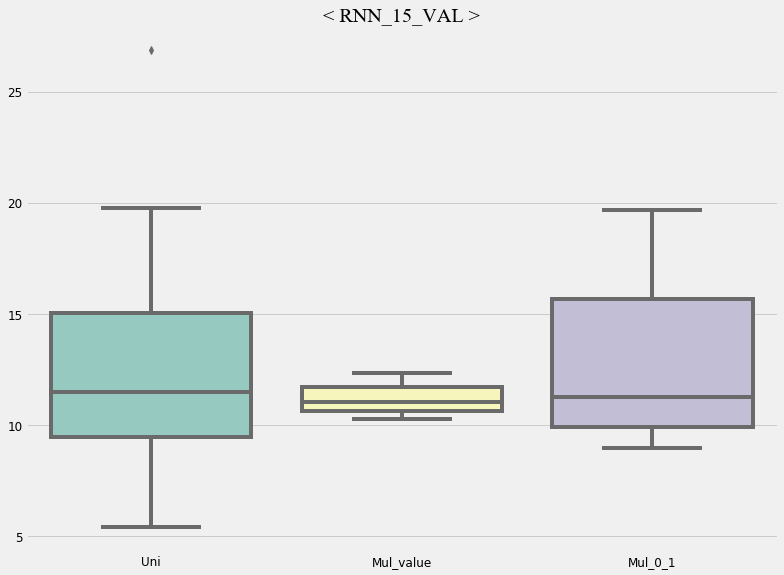

In [14]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_RNN15,palette="Set3")
plt.title('< RNN_15_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< RNN_15_TRAIN >')

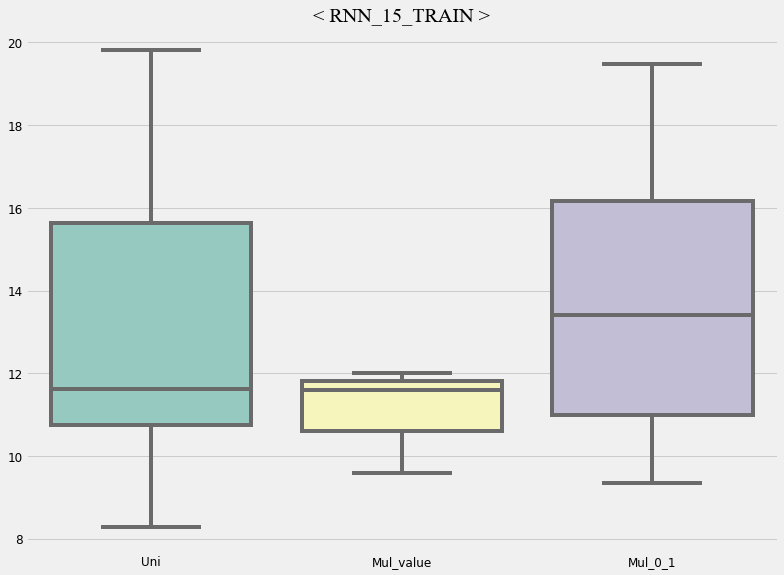

In [15]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_RNN15,palette="Set3")
plt.title('< RNN_15_TRAIN >',family='Times New Roman')

Text(0.5, 1.0, '< RNN_30_VAL >')

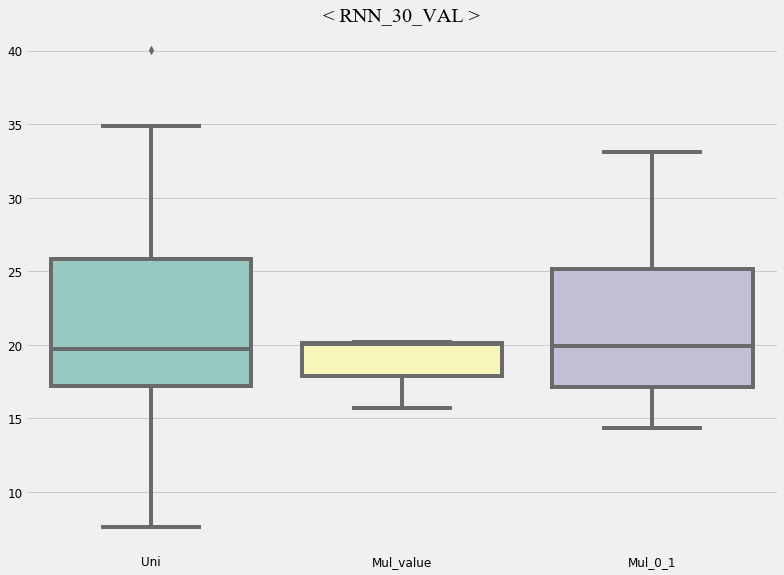

In [16]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_RNN30,palette="Set3")
plt.title('< RNN_30_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< RNN_30_TRAIN >')

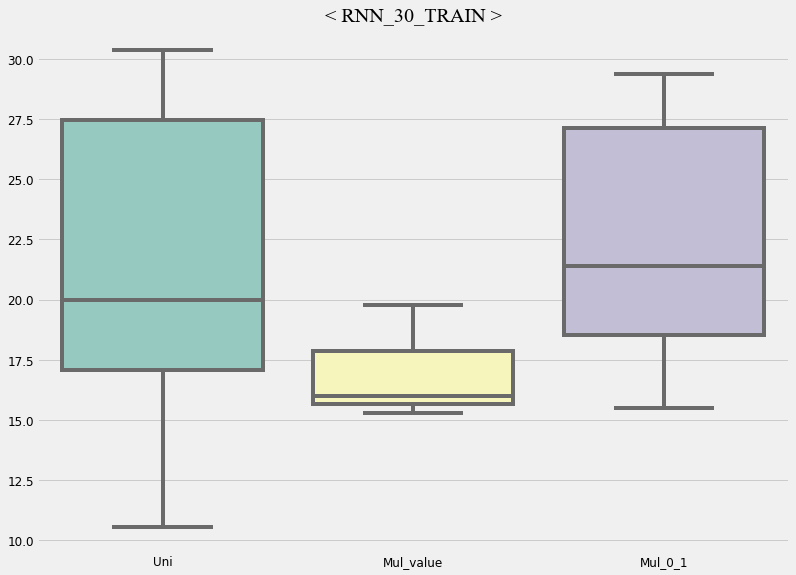

In [17]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_RNN30,palette="Set3")
plt.title('< RNN_30_TRAIN >',family='Times New Roman')

Text(0.5, 1.0, '< RNN_60_VAL >')

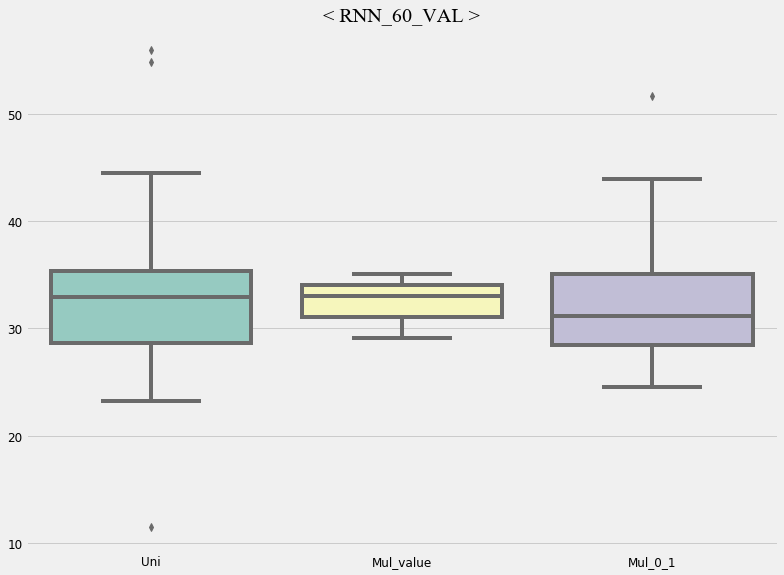

In [18]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_RNN60,palette="Set3")
plt.title('< RNN_60_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< RNN_60_TRAIN >')

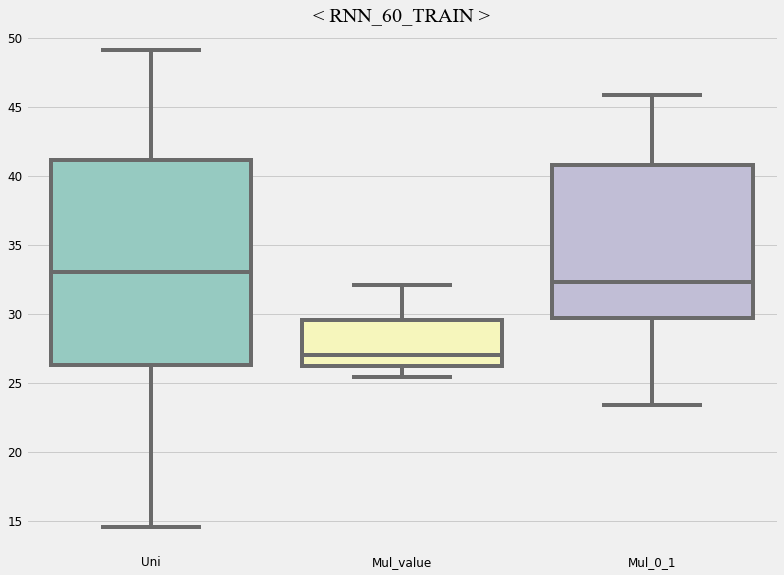

In [19]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_RNN60,palette="Set3")
plt.title('< RNN_60_TRAIN >',family='Times New Roman')

## LSTM

In [20]:
val_LSTM15 = pd.concat([df1_val['LSTM_15'],df2_val['LSTM_15'],df3_val['LSTM_15']],axis=1)
val_LSTM15.columns=['Uni','Mul_value','Mul_0_1']
train_LSTM15 = pd.concat([df1_train['LSTM_15'],df2_train['LSTM_15'],df3_train['LSTM_15']],axis=1)
train_LSTM15.columns=['Uni','Mul_value','Mul_0_1']
val_LSTM30 = pd.concat([df1_val['LSTM_30'],df2_val['LSTM_30'],df3_val['LSTM_30']],axis=1)
val_LSTM30.columns=['Uni','Mul_value','Mul_0_1']
train_LSTM30 = pd.concat([df1_train['LSTM_30'],df2_train['LSTM_30'],df3_train['LSTM_30']],axis=1)
train_LSTM30.columns=['Uni','Mul_value','Mul_0_1']
val_LSTM60 = pd.concat([df1_val['LSTM_60'],df2_val['LSTM_60'],df3_val['LSTM_60']],axis=1)
val_LSTM60.columns=['Uni','Mul_value','Mul_0_1']
train_LSTM60 = pd.concat([df1_train['LSTM_60'],df2_train['LSTM_60'],df3_train['LSTM_60']],axis=1)
train_LSTM60.columns=['Uni','Mul_value','Mul_0_1']

Text(0.5, 1.0, '< LSTM_15_VAL >')

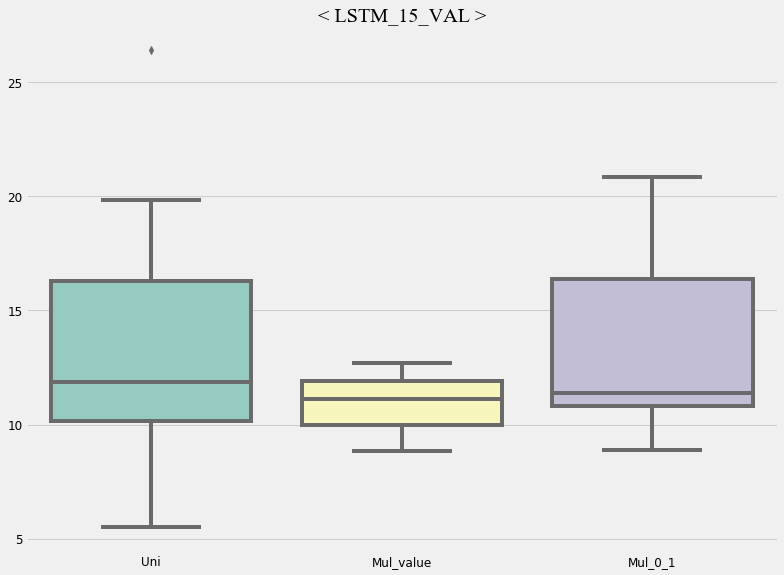

In [21]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_LSTM15,palette="Set3")
plt.title('< LSTM_15_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< LSTM_15_TRAIN >')

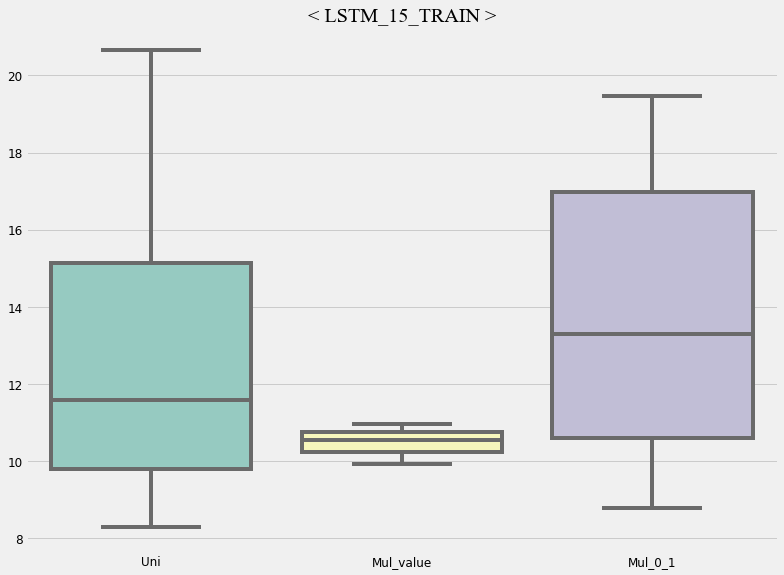

In [22]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_LSTM15,palette="Set3")
plt.title('< LSTM_15_TRAIN >',family='Times New Roman')

Text(0.5, 1.0, '< LSTM_30_VAL >')

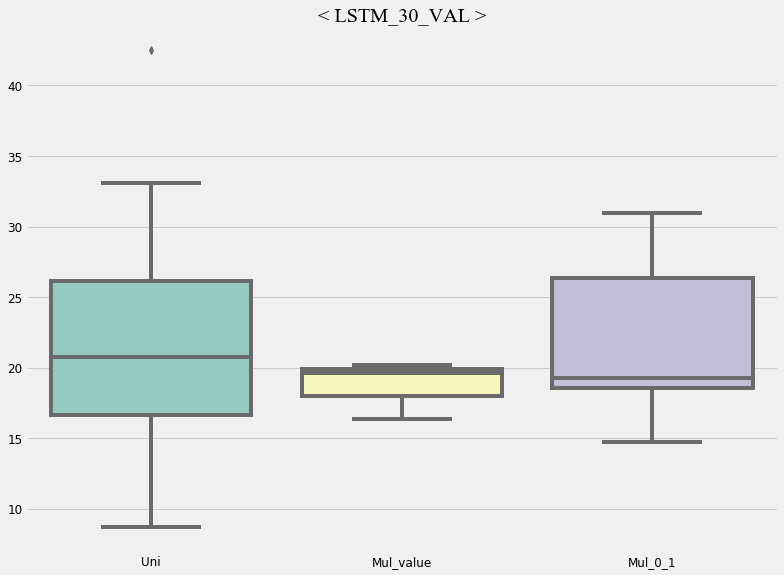

In [23]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_LSTM30,palette="Set3")
plt.title('< LSTM_30_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< LSTM_30_TRAIN >')

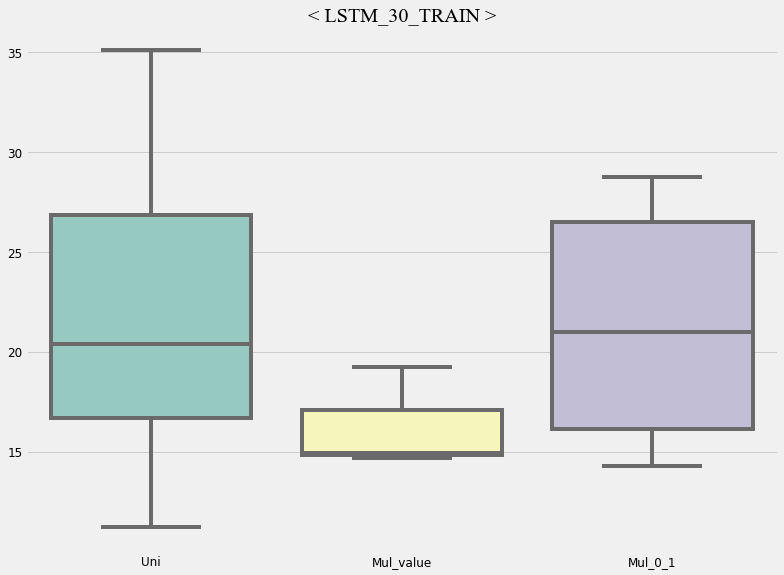

In [24]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_LSTM30,palette="Set3")
plt.title('< LSTM_30_TRAIN >',family='Times New Roman')

Text(0.5, 1.0, '< LSTM_60_VAL >')

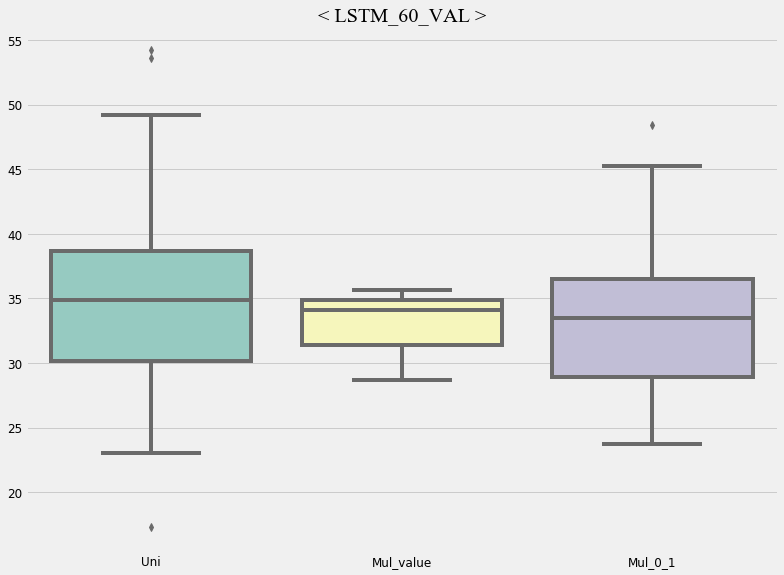

In [25]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_LSTM60,palette="Set3")
plt.title('< LSTM_60_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< LSTM_60_TRAIN >')

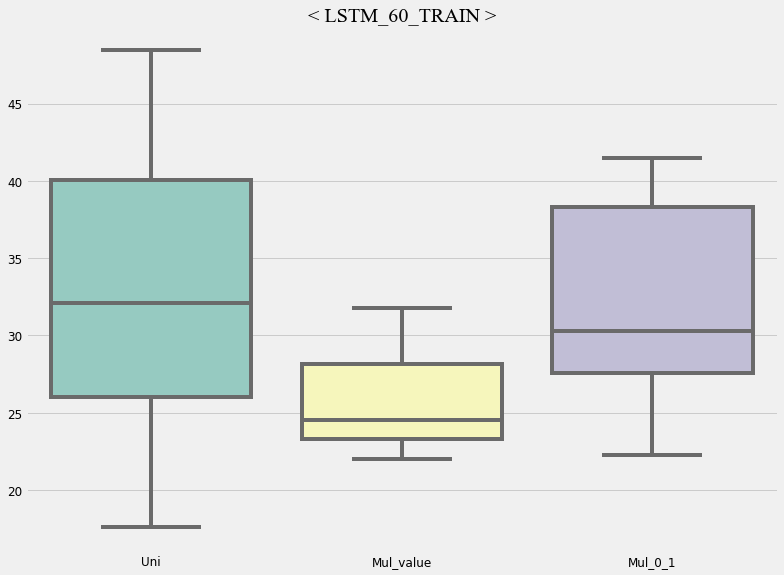

In [26]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_LSTM60,palette="Set3")
plt.title('< LSTM_60_TRAIN >',family='Times New Roman')

## Stacked LSTM

In [27]:
val_SLSTM15 = pd.concat([df1_val['SLSTM_15'],df2_val['SLSTM_15'],df3_val['SLSTM_15']],axis=1)
val_SLSTM15.columns=['Uni','Mul_value','Mul_0_1']
train_SLSTM15 = pd.concat([df1_train['SLSTM_15'],df2_train['SLSTM_15'],df3_train['SLSTM_15']],axis=1)
train_SLSTM15.columns=['Uni','Mul_value','Mul_0_1']
val_SLSTM30 = pd.concat([df1_val['SLSTM_30'],df2_val['SLSTM_30'],df3_val['SLSTM_30']],axis=1)
val_SLSTM30.columns=['Uni','Mul_value','Mul_0_1']
train_SLSTM30 = pd.concat([df1_train['SLSTM_30'],df2_train['SLSTM_30'],df3_train['SLSTM_30']],axis=1)
train_SLSTM30.columns=['Uni','Mul_value','Mul_0_1']
val_SLSTM60 = pd.concat([df1_val['SLSTM_60'],df2_val['SLSTM_60'],df3_val['SLSTM_60']],axis=1)
val_SLSTM60.columns=['Uni','Mul_value','Mul_0_1']
train_SLSTM60 = pd.concat([df1_train['SLSTM_60'],df2_train['SLSTM_60'],df3_train['SLSTM_60']],axis=1)
train_SLSTM60.columns=['Uni','Mul_value','Mul_0_1']

Text(0.5, 1.0, '< Stacked LSTM_15_VAL >')

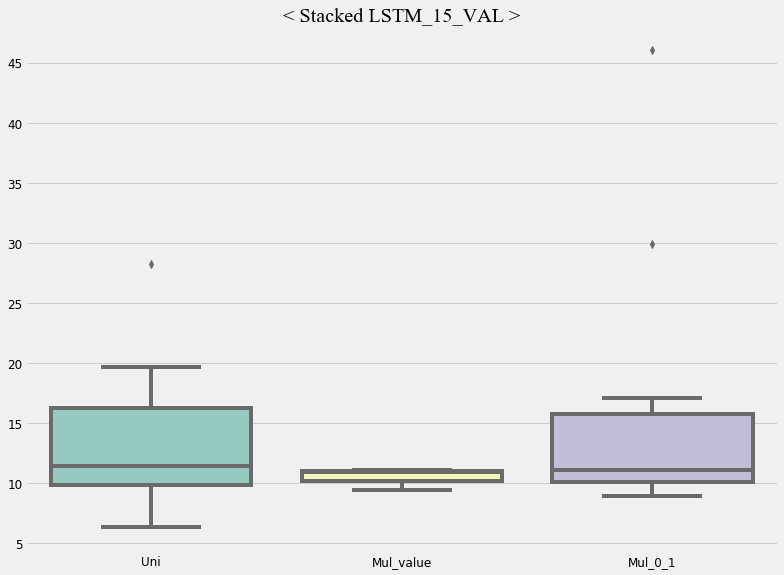

In [28]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_SLSTM15,palette="Set3")
plt.title('< Stacked LSTM_15_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< Stacked LSTM_15_TRAIN >')

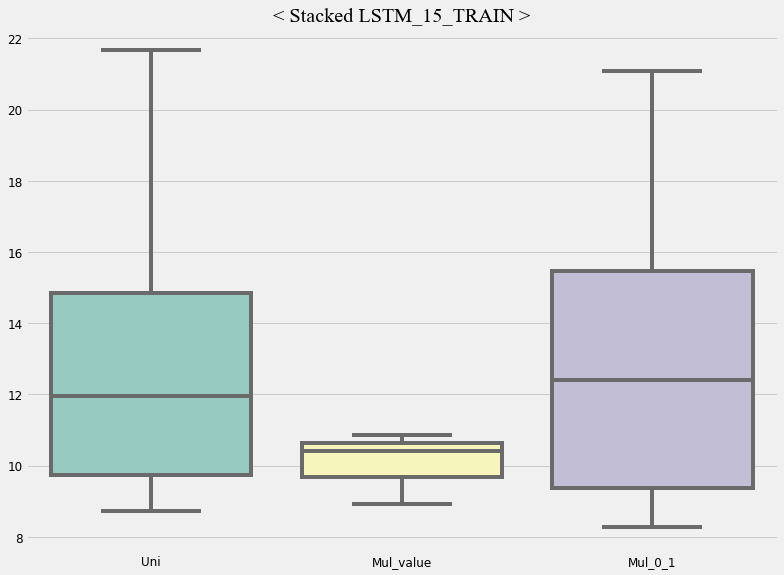

In [29]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_SLSTM15,palette="Set3")
plt.title('< Stacked LSTM_15_TRAIN >',family='Times New Roman')

Text(0.5, 1.0, '< Stacked LSTM_30_VAL >')

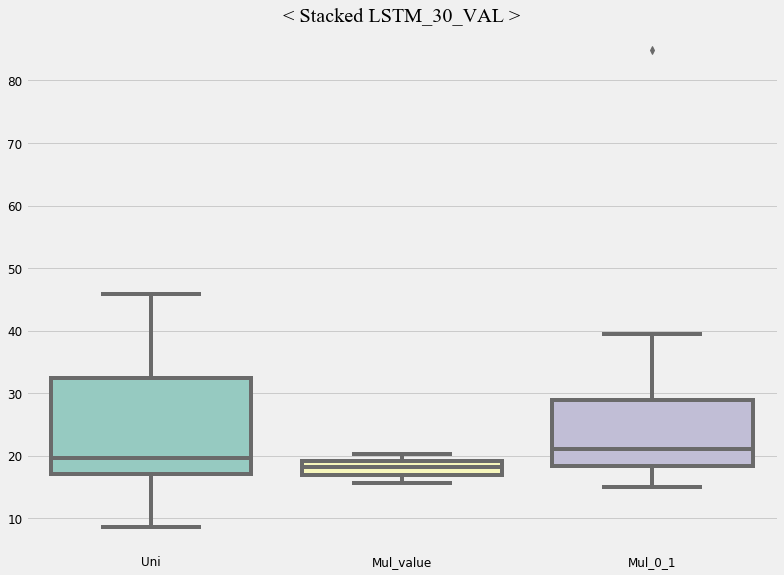

In [30]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_SLSTM30,palette="Set3")
plt.title('< Stacked LSTM_30_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< Stacked LSTM_30_TRAIN >')

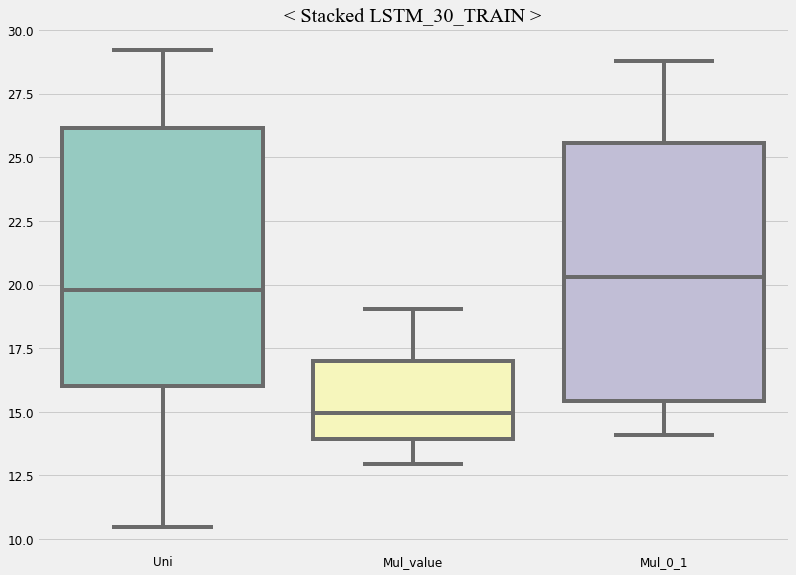

In [31]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_SLSTM30,palette="Set3")
plt.title('< Stacked LSTM_30_TRAIN >',family='Times New Roman')

Text(0.5, 1.0, '< Stacked LSTM_60_VAL >')

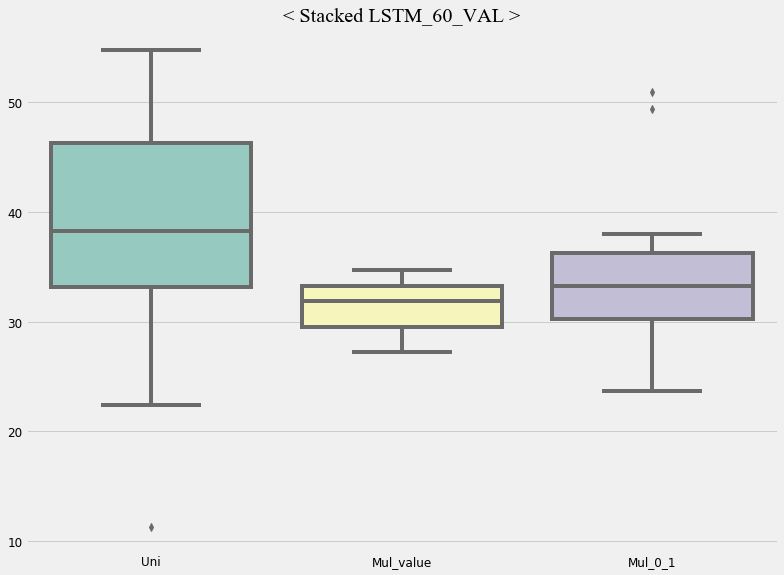

In [32]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_SLSTM60,palette="Set3")
plt.title('< Stacked LSTM_60_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< Stacked LSTM_60_TRAIN >')

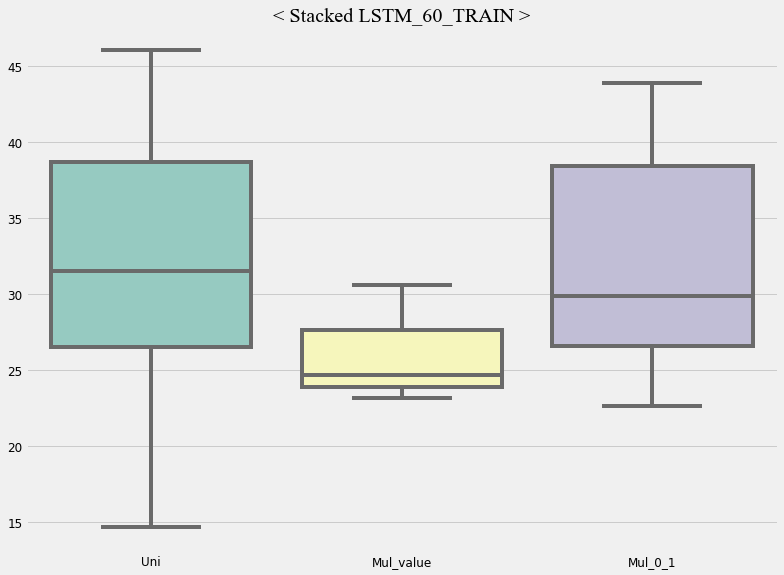

In [33]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_SLSTM60,palette="Set3")
plt.title('< Stacked LSTM_60_TRAIN >',family='Times New Roman')

## Bidirectional LSTM

In [34]:
val_BLSTM15 = pd.concat([df1_val['BLSTM_15'],df2_val['BLSTM_15'],df3_val['BLSTM_15']],axis=1)
val_BLSTM15.columns=['Uni','Mul_value','Mul_0_1']
train_BLSTM15 = pd.concat([df1_train['BLSTM_15'],df2_train['BLSTM_15'],df3_train['BLSTM_15']],axis=1)
train_BLSTM15.columns=['Uni','Mul_value','Mul_0_1']
val_BLSTM30 = pd.concat([df1_val['BLSTM_30'],df2_val['BLSTM_30'],df3_val['BLSTM_30']],axis=1)
val_BLSTM30.columns=['Uni','Mul_value','Mul_0_1']
train_BLSTM30 = pd.concat([df1_train['BLSTM_30'],df2_train['BLSTM_30'],df3_train['BLSTM_30']],axis=1)
train_BLSTM30.columns=['Uni','Mul_value','Mul_0_1']
val_BLSTM60 = pd.concat([df1_val['BLSTM_60'],df2_val['BLSTM_60'],df3_val['BLSTM_60']],axis=1)
val_BLSTM60.columns=['Uni','Mul_value','Mul_0_1']
train_BLSTM60 = pd.concat([df1_train['BLSTM_60'],df2_train['BLSTM_60'],df3_train['BLSTM_60']],axis=1)
train_BLSTM60.columns=['Uni','Mul_value','Mul_0_1']

Text(0.5, 1.0, '< Bidirectional LSTM_15_VAL >')

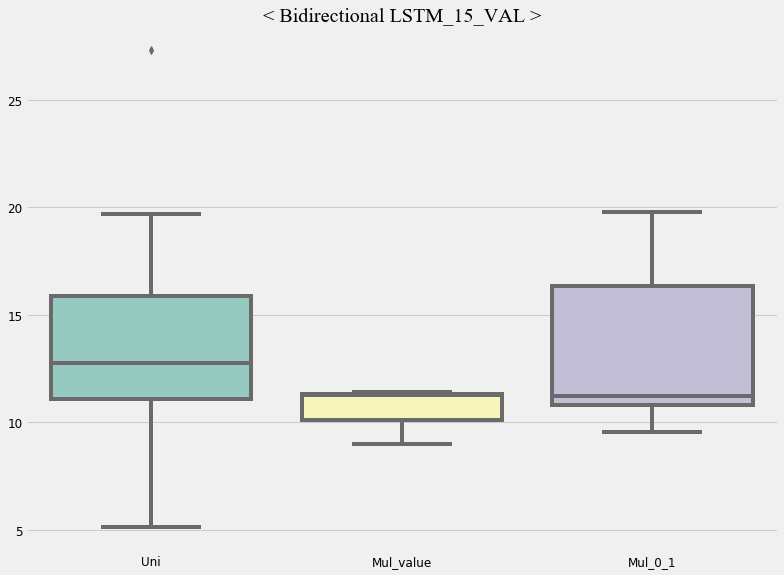

In [35]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_BLSTM15,palette="Set3")
plt.title('< Bidirectional LSTM_15_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< Bidirectional LSTM_15_TRAIN >')

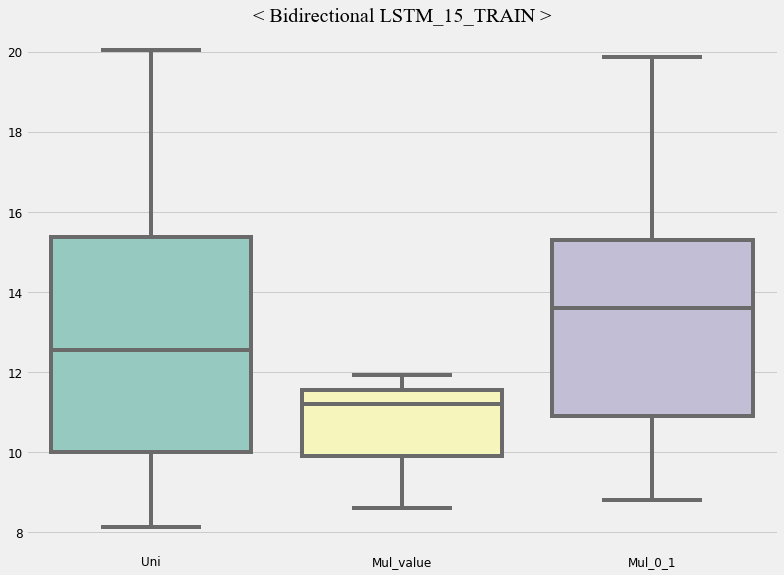

In [36]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_BLSTM15,palette="Set3")
plt.title('< Bidirectional LSTM_15_TRAIN >',family='Times New Roman')

Text(0.5, 1.0, '< Bidirectional LSTM_30_VAL >')

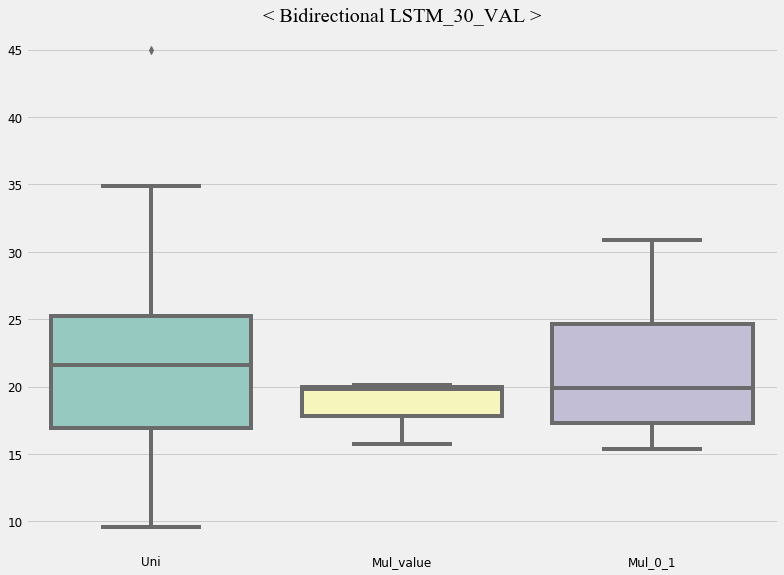

In [37]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_BLSTM30,palette="Set3")
plt.title('< Bidirectional LSTM_30_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< Bidirectional LSTM_30_TRAIN >')

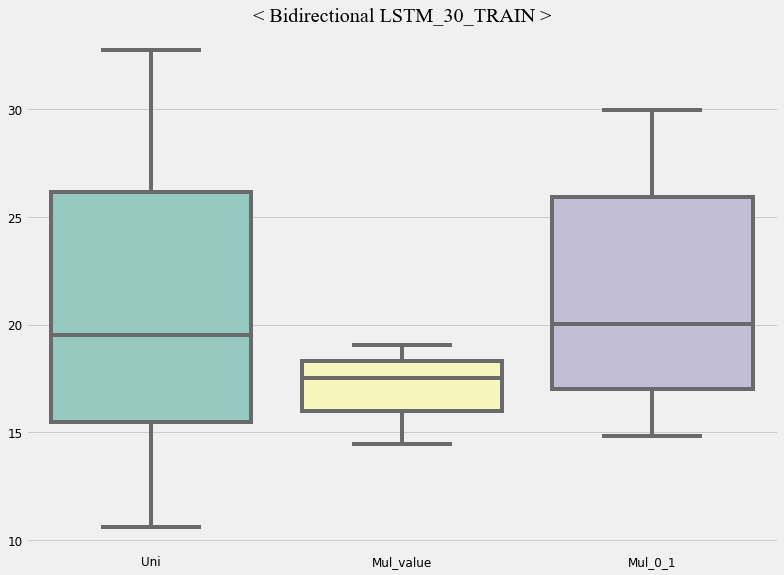

In [38]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_BLSTM30,palette="Set3")
plt.title('< Bidirectional LSTM_30_TRAIN >',family='Times New Roman')

Text(0.5, 1.0, '< Bidirectional LSTM_60_VAL >')

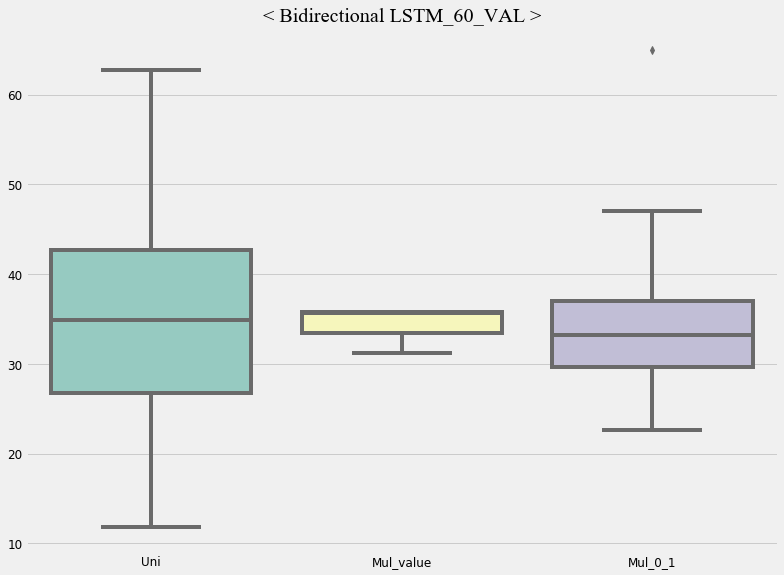

In [39]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_BLSTM60,palette="Set3")
plt.title('< Bidirectional LSTM_60_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< Bidirectional LSTM_60_TRAIN >')

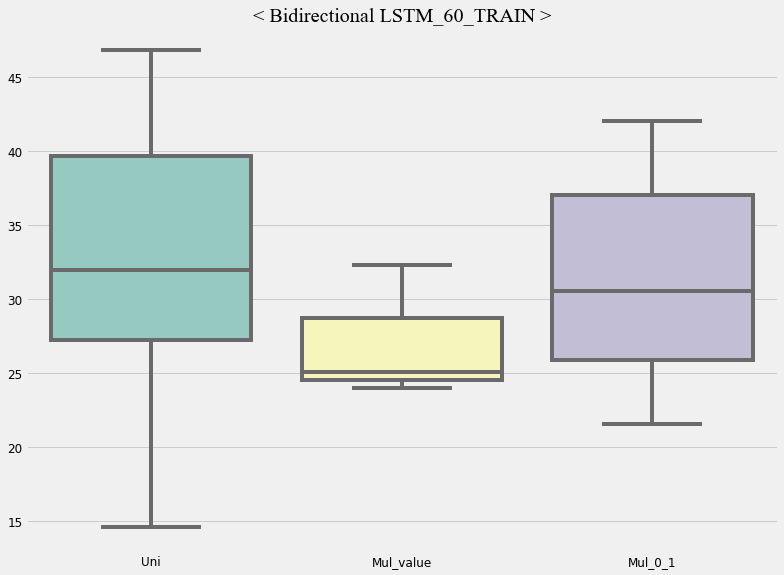

In [40]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_BLSTM60,palette="Set3")
plt.title('< Bidirectional LSTM_60_TRAIN >',family='Times New Roman')

## GRU

In [41]:
val_GRU15 = pd.concat([df1_val['GRU_15'],df2_val['GRU_15'],df3_val['GRU_15']],axis=1)
val_GRU15.columns=['Uni','Mul_value','Mul_0_1']
train_GRU15 = pd.concat([df1_train['GRU_15'],df2_train['GRU_15'],df3_train['GRU_15']],axis=1)
train_GRU15.columns=['Uni','Mul_value','Mul_0_1']
val_GRU30 = pd.concat([df1_val['GRU_30'],df2_val['GRU_30'],df3_val['GRU_30']],axis=1)
val_GRU30.columns=['Uni','Mul_value','Mul_0_1']
train_GRU30 = pd.concat([df1_train['GRU_30'],df2_train['GRU_30'],df3_train['GRU_30']],axis=1)
train_GRU30.columns=['Uni','Mul_value','Mul_0_1']
val_GRU60 = pd.concat([df1_val['GRU_60'],df2_val['GRU_60'],df3_val['GRU_60']],axis=1)
val_GRU60.columns=['Uni','Mul_value','Mul_0_1']
train_GRU60 = pd.concat([df1_train['GRU_60'],df2_train['GRU_60'],df3_train['GRU_60']],axis=1)
train_GRU60.columns=['Uni','Mul_value','Mul_0_1']

Text(0.5, 1.0, '< GRU_15_VAL >')

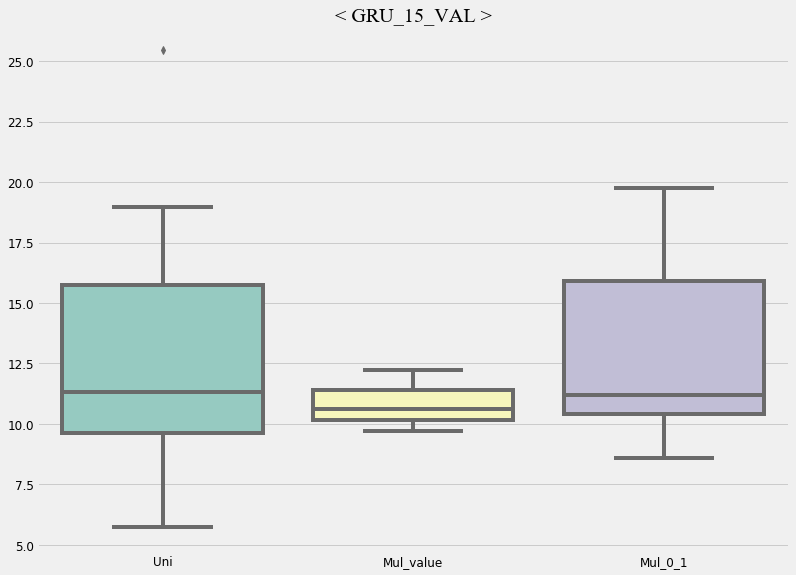

In [42]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_GRU15,palette="Set3")
plt.title('< GRU_15_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< GRU_15_TRAIN >')

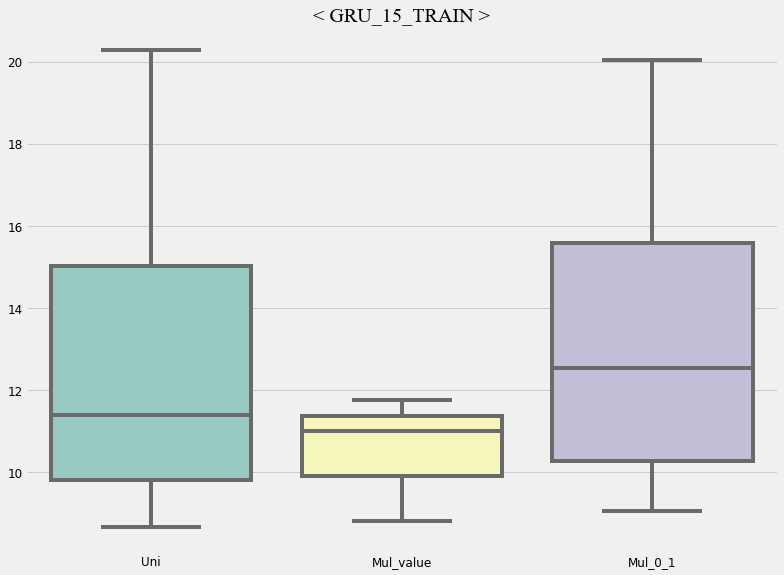

In [43]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_GRU15,palette="Set3")
plt.title('< GRU_15_TRAIN >',family='Times New Roman')

Text(0.5, 1.0, '< GRU_30_VAL >')

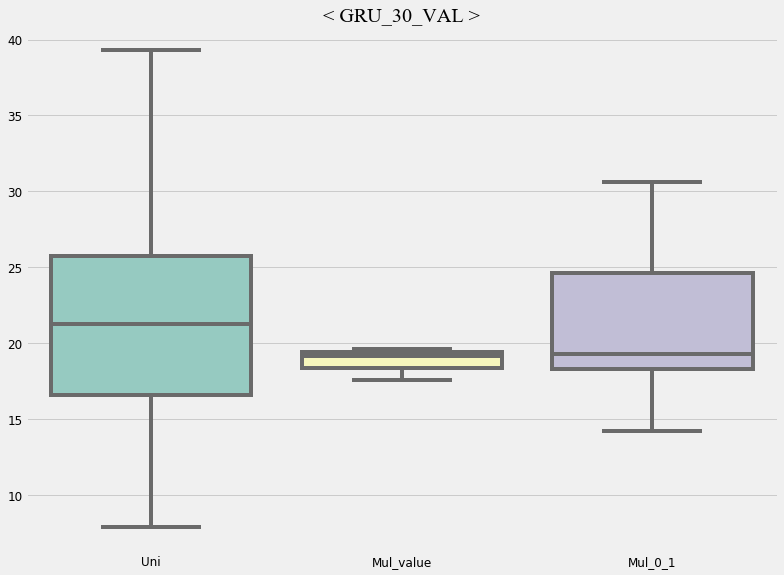

In [44]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_GRU30,palette="Set3")
plt.title('< GRU_30_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< GRU_30_TRAIN >')

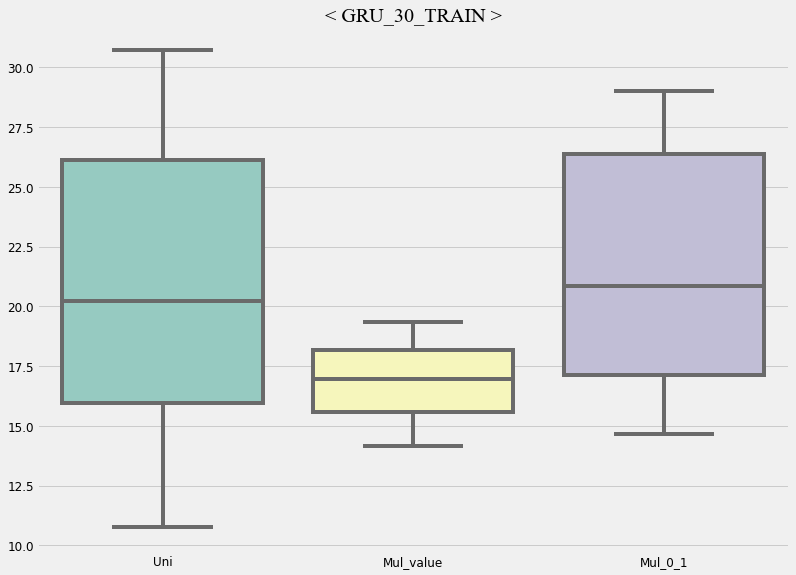

In [45]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_GRU30,palette="Set3")
plt.title('< GRU_30_TRAIN >',family='Times New Roman')

Text(0.5, 1.0, '< GRU_60_VAL >')

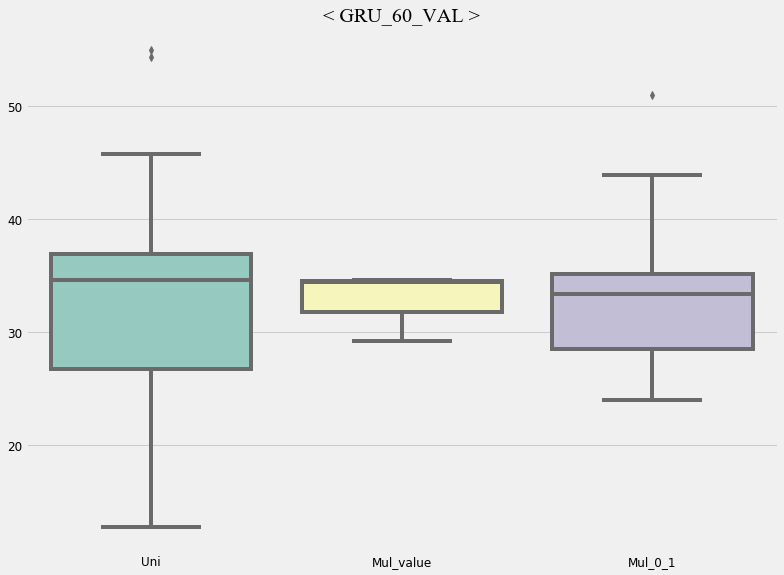

In [46]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_GRU60,palette="Set3")
plt.title('< GRU_60_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< GRU_60_TRAIN >')

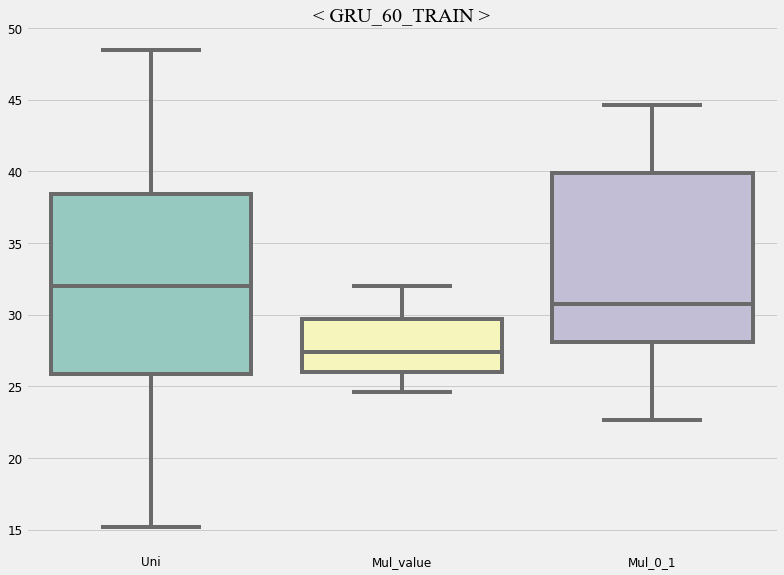

In [47]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_GRU60,palette="Set3")
plt.title('< GRU_60_TRAIN >',family='Times New Roman')